### Fake News Detection

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
dataset = pd.read_csv('train.csv')



print(dataset.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [3]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:

null = []
for i in range(len(dataset)):
  if str(dataset.values[i, 3]) == 'nan':
    null.append(i)

dataset = dataset.drop(null)

print(dataset.isnull().sum())


id           0
title      558
author    1918
text         0
label        0
dtype: int64


In [5]:

dataset = dataset.fillna('nil')

print(dataset.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64


0    10387
1    10374
Name: label, dtype: int64


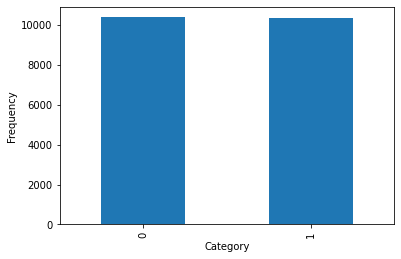

In [6]:

print(dataset['label'].value_counts())
dataset['label'].value_counts().plot.bar()
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [7]:

dataset['text'] = dataset['title']+dataset['text']

dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,Why the Truth Might Get You FiredWhy the Truth...,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Iranian woman jailed for fictional unpublished...,1


In [8]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [9]:

words = set(stopwords.words('english'))
words = words - set(['no', 'not', 'against'])

corpus = []
for i in range(len(dataset)):
  news = re.sub('[^a-zA-Z]', ' ', dataset.values[i, 3])
  news = news.lower()
  news = news.split()
  news = [ps.stem(word) for word in news if word not in words]
  news = ' '.join(news)
  corpus.append(news)

print(corpus[0])


hous dem aid even see comey letter jason chaffetz tweet ithous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann no doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform not long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know not case comey actual say review email light unrel c

In [10]:

cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(corpus).toarray()

y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [11]:


classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

C:\Users\bharg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:

cm = confusion_matrix(y_pred, y_test)
cm

array([[990,  41],
       [ 50, 996]], dtype=int64)

In [13]:

acc = cross_val_score(classifier, X_train, y_train, cv=10)
print(np.mean(acc))

C:\Users\bharg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bharg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

0.9487797067675807


In [14]:
import pickle as pkl

In [15]:
pkl.dump(classifier, open("model.pkl", "wb"))